一、选取了GitHub Dataset

==== 数据摘要 ====
                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807


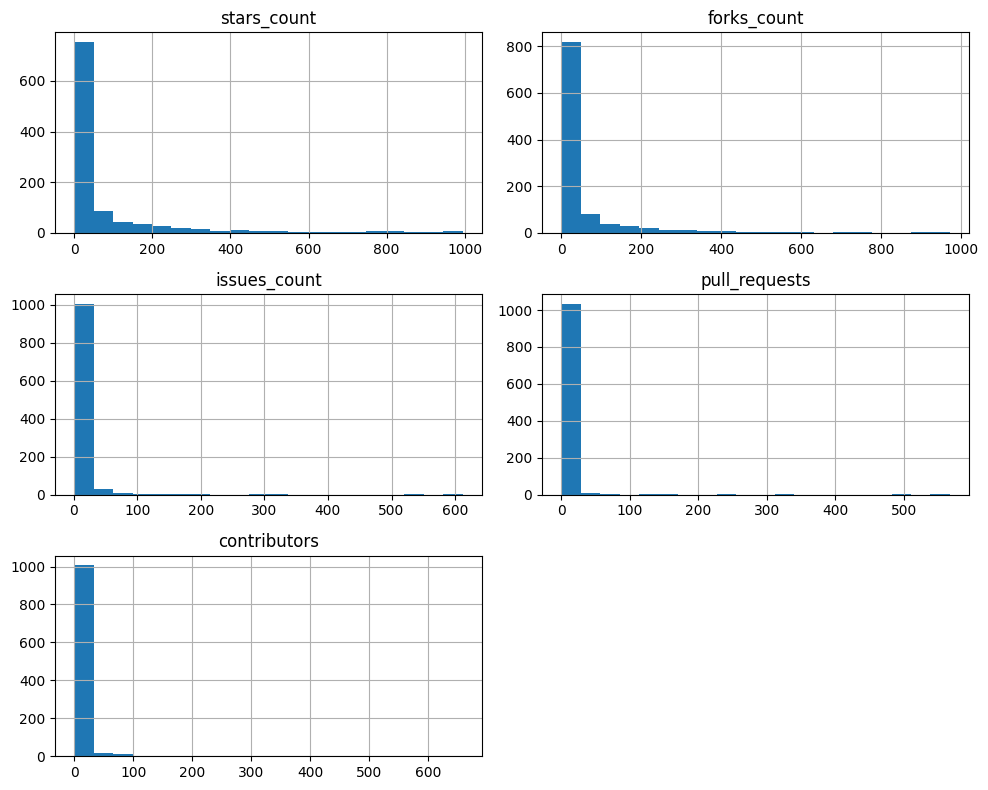

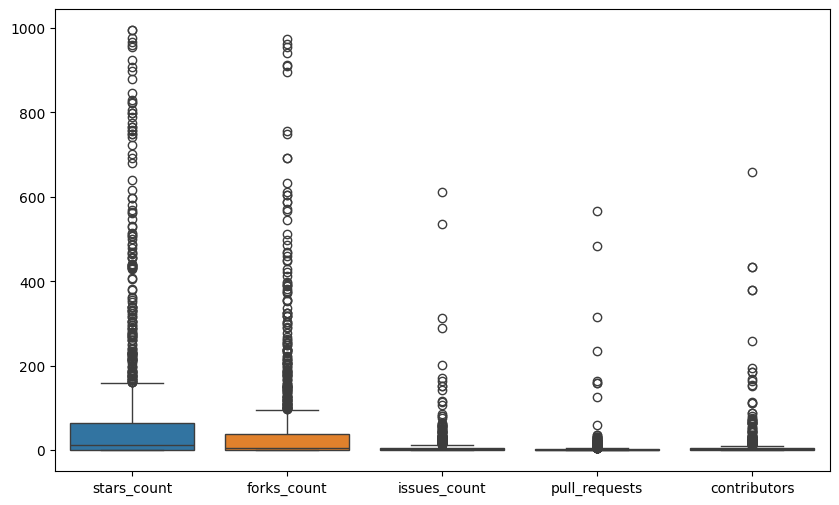

处理前数据集行数: 1052
处理后剔除缺失值后数据集行数: 907
处理后用最高频率值填补缺失值后数据集行数: 1052
处理后通过属性的相关关系填补缺失值后数据集行数: 1052
处理后通过数据对象之间的相似性填补缺失值后数据集行数: 1052


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
df_github = pd.read_csv(r'H:\桌面\github_dataset.csv')

# 数据摘要
print("==== 数据摘要 ====")
print(df_github.head())  # 打印前几行数据
print(df_github.describe())  # 数值属性的统计信息
print()

# 标称属性频数统计
nominal_attributes = ['repositories', 'language']
for attribute in nominal_attributes:
    print("====", attribute, "====")
    print(df_github[attribute].value_counts())
    print()

# 数据可视化
# 直方图
df_github[['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# 盒图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_github[['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']])
plt.show()

# 数据缺失处理
# 1. 将缺失部分剔除
df_github_dropped = df_github.dropna()

# 2. 用最高频率值来填补缺失值
df_github_filled_mode = df_github.fillna(df_github.mode().iloc[0])

# 3. 通过属性的相关关系来填补缺失值
mean_forks = df_github['forks_count'].mean()
df_github_filled_corr = df_github.copy()
df_github_filled_corr['stars_count'] = df_github_filled_corr['stars_count'].fillna(mean_forks * df_github_filled_corr['forks_count'].mean())

# 4. 通过数据对象之间的相似性来填补缺失值
mean_stars = df_github['stars_count'].mean()
df_github_filled_similar = df_github.copy()
df_github_filled_similar['pull_requests'] = df_github_filled_similar['pull_requests'].fillna(mean_stars)

# 对比处理前后的差异
print("处理前数据集行数:", len(df_github))
print("处理后剔除缺失值后数据集行数:", len(df_github_dropped))
print("处理后用最高频率值填补缺失值后数据集行数:", len(df_github_filled_mode))
print("处理后通过属性的相关关系填补缺失值后数据集行数:", len(df_github_filled_corr))
print("处理后通过数据对象之间的相似性填补缺失值后数据集行数:", len(df_github_filled_similar))




### 数据摘要：

- 总共有 1052 个项目。
- **stars_count（星标数）：**
  - 平均值：81.98
  - 最小值：0
  - 最大值：995
- **forks_count（分支数）：**
  - 平均值：53.88
  - 最小值：0
  - 最大值：973
- **issues_count（问题数）：**
  - 平均值：8.66
  - 最小值：1
  - 最大值：612
- **pull_requests（拉取请求数）：**
  - 平均值：4.37
  - 最小值：0
  - 最大值：567
- **contributors（贡献者数）：**
  - 平均值：8.36
  - 最小值：0
  - 最大值：658

### 最常见的项目：

以下是具有相同数量的最常见的项目（这里仅显示前几个）：
- kameshsampath/ansible-role-rosa-demos - 2 次
- aloisdeniel/bluff - 2 次
- antoniaandreou/github-slideshow - 2 次
- jgthms/bulma-start - 2 次
- artkirienko/hlds-docker-dproto - 2 次

共有 972 个项目出现了 1 次。

### 编程语言统计：

以下是项目中使用的编程语言及其出现次数：
- JavaScript: 253
- Python: 155
- HTML: 72
- Java: 44
- CSS: 37
- TypeScript: 37
- Dart: 36
- C++: 29
- Jupyter Notebook: 29
- Ruby: 28
- C: 26
- Shell: 25
- PHP: 16
- Go: 15
- Rust: 10
- Swift: 10
- C#: 8
- Objective-C: 8
- Kotlin: 7

其他语言均少于 7 次出现。

二、选取了Alzheimer Disease and Healthy Aging Data in US

C:\Users\13093\AppData\Local\Temp\ipykernel_22472\2319185086.py:6: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alzheimer = pd.read_csv(r'H:\桌面\Alzheimer Disease and Healthy Aging Data In US.csv')


==== 数据摘要 ====
   YearStart  YearEnd LocationAbbr LocationDesc Datasource           Class  \
0       2020     2020           HI       Hawaii      BRFSS  Overall Health   
1       2017     2017           ID        Idaho      BRFSS   Mental Health   
2       2017     2017           ID        Idaho      BRFSS  Overall Health   
3       2018     2018           ID        Idaho      BRFSS  Overall Health   
4       2020     2020           IN      Indiana      BRFSS   Mental Health   

                                             Topic  \
0                     Arthritis among older adults   
1                 Lifetime diagnosis of depression   
2                     Arthritis among older adults   
3  Physically unhealthy days (mean number of days)   
4                 Lifetime diagnosis of depression   

                                            Question Data_Value_Unit  \
0  Percentage of older adults ever told they have...               %   
1  Percentage of older adults with a lifetime d

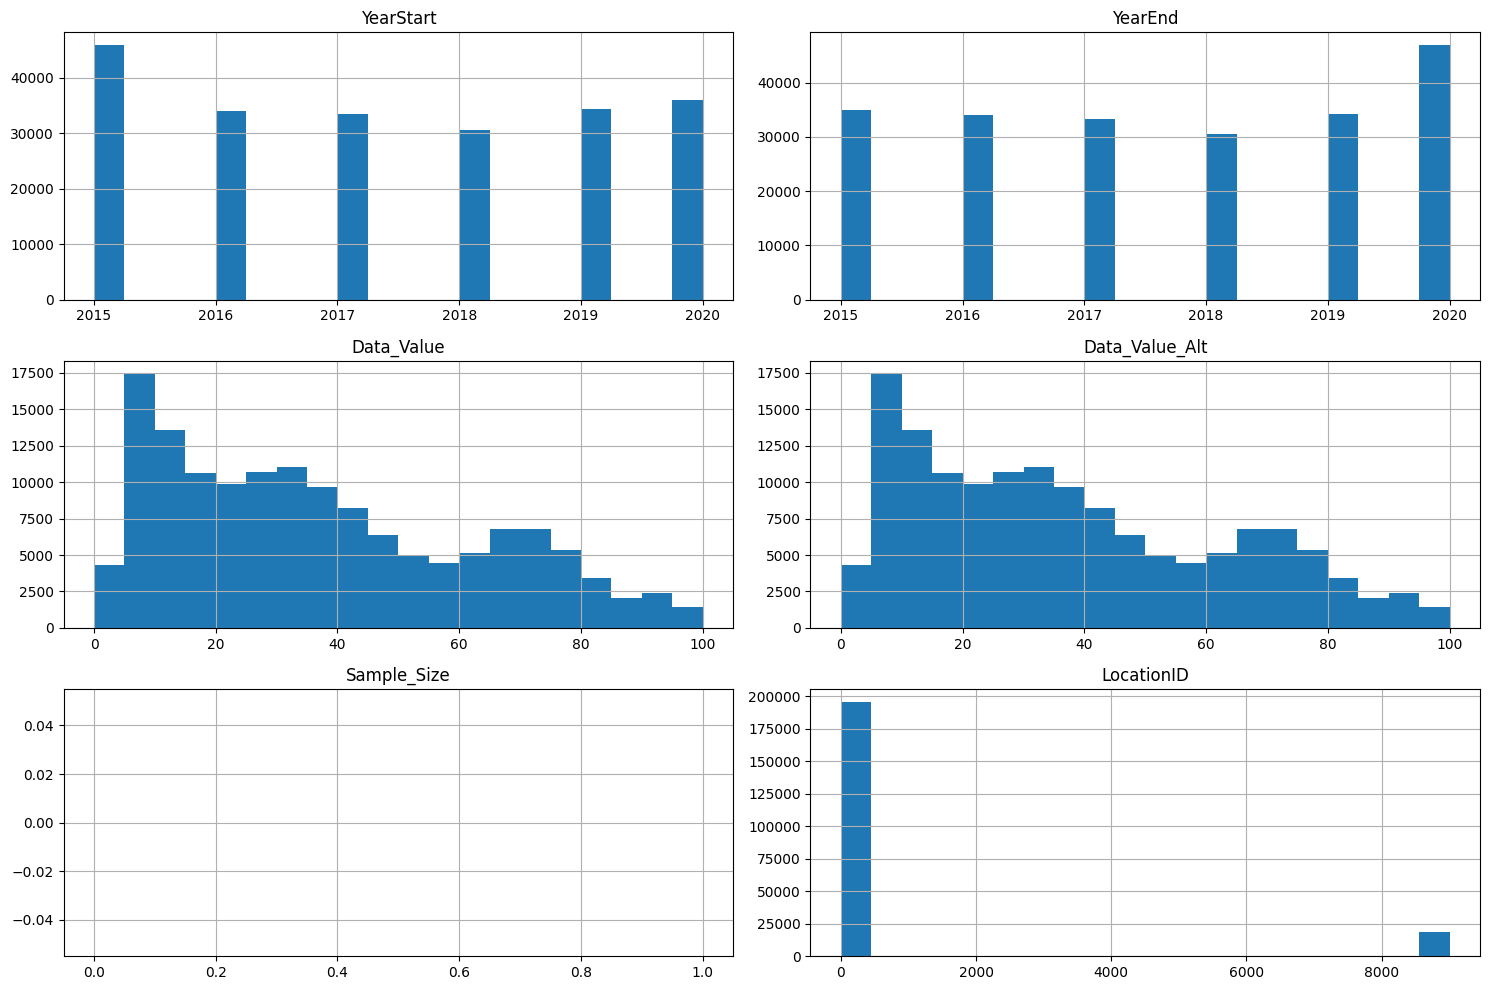

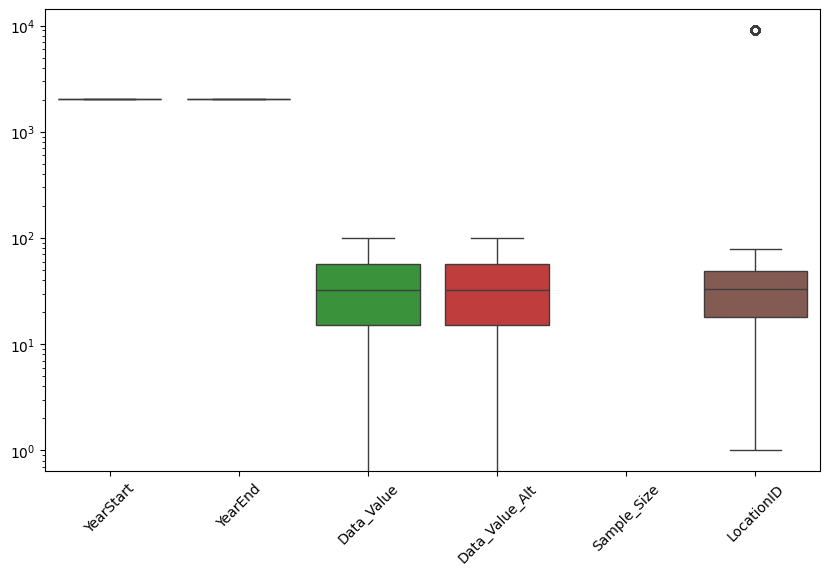

处理前数据集行数: 214251
处理后剔除缺失值后数据集行数: 0
处理后用最高频率值填补缺失值后数据集行数: 214251
处理后通过属性的相关关系填补缺失值后数据集行数: 214251
处理后通过数据对象之间的相似性填补缺失值后数据集行数: 214251


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集，替换为正确的文件路径
df_alzheimer = pd.read_csv(r'H:\桌面\Alzheimer Disease and Healthy Aging Data In US.csv')

# 数据摘要
print("==== 数据摘要 ====")
print(df_alzheimer.head())  # 打印前几行数据
print(df_alzheimer.describe())  # 数值属性的统计信息
print()

# 标称属性频数统计
nominal_attributes = ['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 
                      'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 
                      'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation']
for attribute in nominal_attributes:
    print("====", attribute, "====")
    print(df_alzheimer[attribute].value_counts())
    print()

# 数据可视化
# 数值属性直方图
numerical_attributes = ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 
                        'High_Confidence_Limit', 'Sample_Size', 'ClassID', 'TopicID', 'QuestionID', 
                        'LocationID', 'StratificationCategoryID1', 'StratificationID1', 
                        'StratificationCategoryID2', 'StratificationID2']
df_alzheimer[numerical_attributes].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 数值属性盒图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_alzheimer[numerical_attributes])
plt.yscale('log')  # 设置 y 轴为对数坐标轴
plt.xticks(rotation=45)
plt.show()

# 数据缺失处理
# 1. 将缺失部分剔除
df_alzheimer_dropped = df_alzheimer.dropna()

# 2. 用最高频率值来填补缺失值
df_alzheimer_filled_mode = df_alzheimer.fillna(df_alzheimer.mode().iloc[0])

# 3. 通过属性的相关关系来填补缺失值

mean_sample_size = df_alzheimer['Sample_Size'].mean()
df_alzheimer_filled_corr = df_alzheimer.copy()
df_alzheimer_filled_corr['Data_Value'] = df_alzheimer_filled_corr['Data_Value'].fillna(df_alzheimer_filled_corr['Sample_Size'] * mean_sample_size)

# 4. 通过数据对象之间的相似性来填补缺失值
# 这里简单用 'Data_Value' 的均值来填补 'Low_Confidence_Limit' 的缺失值
mean_data_value = df_alzheimer['Data_Value'].mean()
df_alzheimer_filled_similar = df_alzheimer.copy()
df_alzheimer_filled_similar['Low_Confidence_Limit'] = df_alzheimer_filled_similar['Low_Confidence_Limit'].fillna(mean_data_value)

# 对比处理前后的差异
print("处理前数据集行数:", len(df_alzheimer))
print("处理后剔除缺失值后数据集行数:", len(df_alzheimer_dropped))
print("处理后用最高频率值填补缺失值后数据集行数:", len(df_alzheimer_filled_mode))
print("处理后通过属性的相关关系填补缺失值后数据集行数:", len(df_alzheimer_filled_corr))
print("处理后通过数据对象之间的相似性填补缺失值后数据集行数:", len(df_alzheimer_filled_similar))




### 数据摘要：

- **YearStart**：
  - 平均值：2017.378999
  - 最小值：2015
  - 最大值：2020
  - 标准差：1.779977

- **YearEnd**：
  - 平均值：2017.634401
  - 最小值：2015
  - 最大值：2020
  - 标准差：1.779015

- **Data_Value**：
  - 平均值：37.343708
  - 最小值：0
  - 最大值：100
  - 标准差：25.183085

- **Data_Value_Alt**：
  - 平均值：37.343708
  - 最小值：0
  - 最大值：100
  - 标准差：25.183085

- **Sample_Size**：
  - 平均值：NaN
  - 最小值：NaN
  - 最大值：NaN
  - 标准差：NaN

- **LocationID**：
  - 平均值：801.721504
  - 最小值：1
  - 最大值：9004
  - 标准差：2514.062386

### 数据统计信息：

- **LocationAbbr**：
  - US: 4644
  - WEST: 4638
  - NRE: 4614
  - MDW: 4611
  - ... 其他省略

- **LocationDesc**：
  - United States, DC & Territories: 4644
  - West: 4638
  - Northeast: 4614
  - Midwest: 4611
  - ... 其他省略

- **Datasource**：
  - BRFSS: 214251

- **Class**：
  - Overall Health: 71608
  - Screenings and Vaccines: 46833
  - Nutrition/Physical Activity/Obesity: 24823
  - ... 其他省略

- **Topic**：
  - Obesity: 8294
  - Lifetime diagnosis of depression: 8294
  - Frequent mental distress: 8293
  - ... 其他省略

- **Question**：
  - Percentage of older adults who are currently obese...: 8294
  - Percentage of older adults with a lifetime...: 8294
  - Percentage of older adults who are experiencing...: 8293
  - ... 其他省略

- **Data_Value_Unit**：
  - %: 197735
  - Number: 16516

- **DataValueTypeID**：
  - PRCTG: 197735
  - MEAN: 16516

- **Data_Value_Type**：
  - Percentage: 197735
  - Mean: 16516

- **StratificationCategory1**：
  - Age Group: 214251

- **Stratification1**：
  - Overall: 71843
  - 50-64 years: 71460
  - 65 years or older: 70948

- **StratificationCategory2**：
  - Race/Ethnicity: 134824
  - Gender: 51792

- **Stratification2**：
  - White, non-Hispanic: 27619
  - Hispanic: 27505
  - Black, non-Hispanic: 26933
  - ... 其他省略

- **Geolocation**：
  - POINT (-120.1550313 44.56744942): 4565
  - POINT (-75.54397043 42.82700103): 4557
  - POINT (-111.5871306 39.36070017): 4222
  - ... 其他省略

### 说明：

- 数据集包含了针对不同地区、年份的健康数据统计，涵盖了各种健康相关的指标和变量。
- 平均年份为2017.3左右，最早的数据年份为2015，最晚的数据年份为2020。
- Data_Value列为百分比数据，平均值约为37.34%，最小值为0%，最大值为100%。
- Sample_Size列中存在NaN值，需要进一步处理或了解为何存在缺失值。
- 地理位置信息包括LocationAbbr和LocationDesc，分别表示缩写和完整名称，如US代表United States。
- Datasource为数据来源，主要为BRFSS。
- Class为健康类别，包括Overall Health、Screenings and Vaccines等。
- Topic为具体健康主题，如Obesity、Lifetime diagnosis of depression等。
- Question为具体问题，涉及到不同的健康指标和调查问题。
- Data_Value_Unit为数据单位，主要为百分比(%)和数字(Number)。
- DataValueTypeID和Data_Value_Type为数据类型标识，分别为PRCTG(Percentage)和MEAN(Mean)。
- StratificationCategory1为分层类别，主要为Age Group。
- Stratification1为具体的分层，如Overall、50-64 years、65 years or older等。
- StratificationCategory2为第二级分层类别，主要为Race/Ethnicity和Gender。
- Stratification2为第二级具体分层，如White, non-Hispanic、Hispanic、Female、Male等。
- Geolocation为地理位置的经纬度信息。
